In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Key Insights Markdown (use markdown cells to summarize your findings):
# - List insights discovered during EDA, for example:
#   - Most loan applicants have a purpose of "debt consolidation."
#   - Higher CIBIL scores are associated with lower default rates.
#   - Add more insights based on your analysis.


In [ ]:
# Load the Dataset
# Update file paths as per your local setup
train_data_path = 'train_data.xlsx'
test_data_path = 'test_data.xlsx'



In [ ]:
# Load datasets
train_data = pd.read_excel(train_data_path)
test_data = pd.read_excel(test_data_path)



In [ ]:
# Display basic information
print("Train Data Overview:")
print(train_data.info())
print("\nTest Data Overview:")
print(test_data.info())



Train Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64      

In [ ]:
# Display the first few rows of train and test data
print("\nTrain Data Sample:")
print(train_data.head())
print("\nTest Data Sample:")
print(test_data.head())




Train Data Sample:
   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0    

In [ ]:
# Check for missing values
print(train_data.isnull().sum())

print(test_data.isnull().sum())



customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [ ]:
# Summary Statistics
print("\nSummary Statistics of Train Data:")
print(train_data.describe())






Summary Statistics of Train Data:
        customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000

In [ ]:
print("\nSummary Statistics of Test Data:")
print(test_data.describe())


Summary Statistics of Test Data:
        customer_id               transaction_date  cibil_score  \
count  8.455000e+03                           8455  8455.000000   
mean   7.882215e+07  2016-04-29 04:48:40.875221760   686.294500   
min    3.476740e+05            2016-04-01 00:00:00   660.000000   
25%    7.703897e+07            2016-04-01 00:00:00   670.000000   
50%    7.834992e+07            2016-05-01 00:00:00   680.000000   
75%    8.068136e+07            2016-06-01 00:00:00   700.000000   
max    8.436346e+07            2016-06-01 00:00:00   825.000000   
std    3.058865e+06                            NaN    24.451172   

       total_no_of_acc    annual_inc     int_rate     loan_amnt  installment  \
count       8455.00000  8.455000e+03  8455.000000   8455.000000  8455.000000   
mean           0.29450  7.244725e+04    17.186235  15538.302779   488.111989   
min            0.00000  1.884000e+03    12.790000   1000.000000    33.600000   
25%            0.00000  4.300000e+04    13

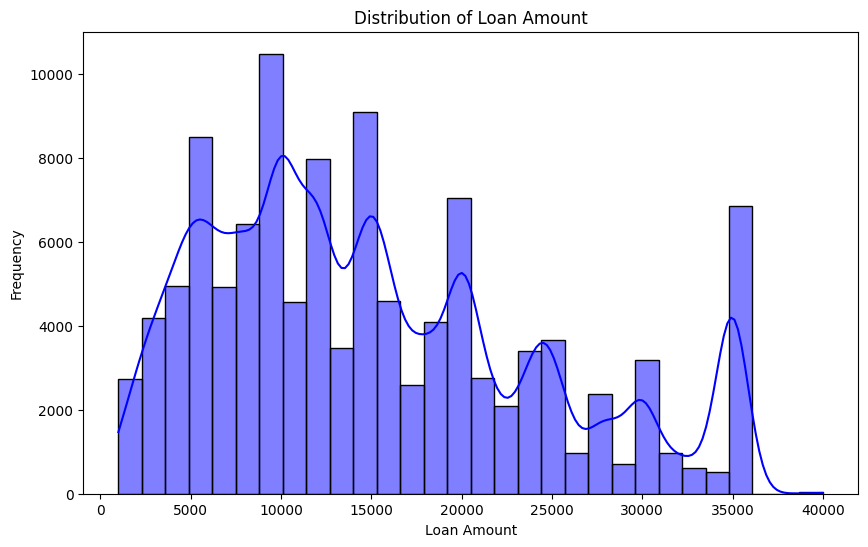

In [ ]:
# Exploratory Data Analysis
# 1. Distribution of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(train_data['loan_amnt'], kde=True, bins=30, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()



<ipython-input-10-4417bf987fa3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='loan_status', palette='Set2')


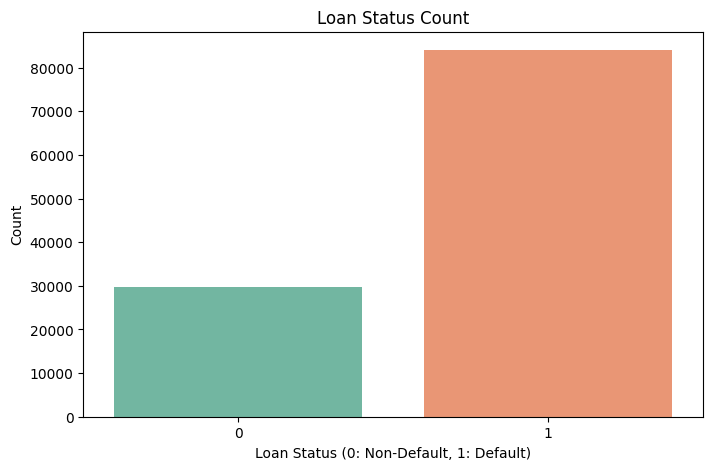

In [ ]:
# 2. Loan Status Count Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='loan_status', palette='Set2')
plt.title('Loan Status Count')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Count')
plt.show()





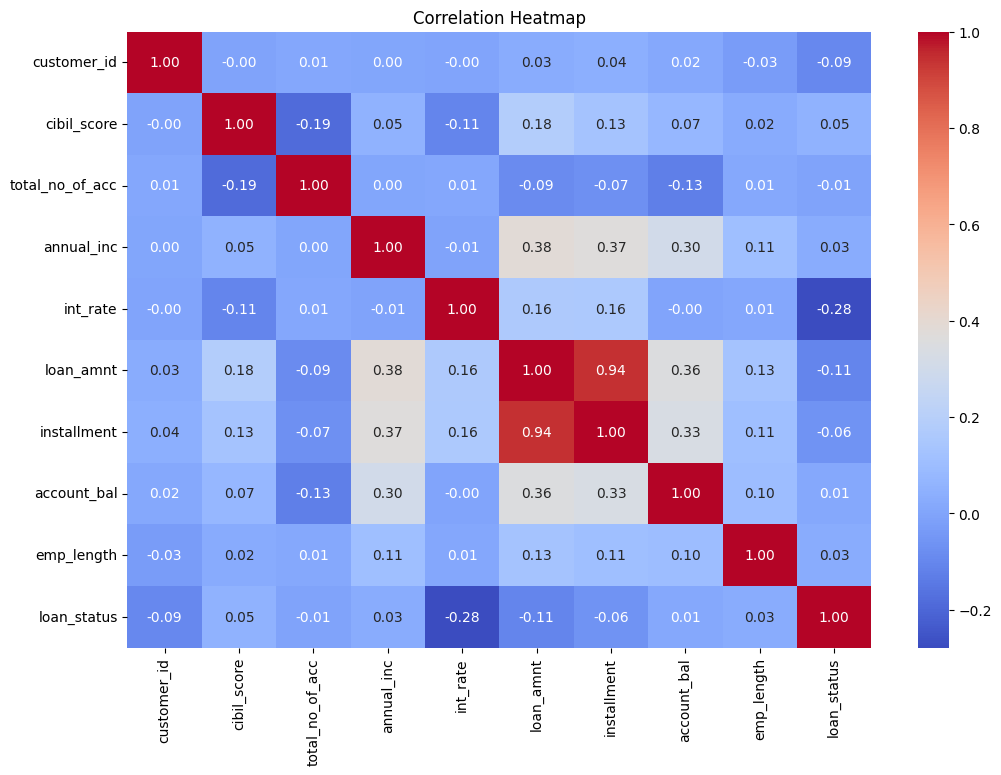

In [ ]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
# Calculate correlation only for numeric columns
correlation_matrix = train_data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-14-42db1193d73c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='loan_status', y='cibil_score', palette='Set3')


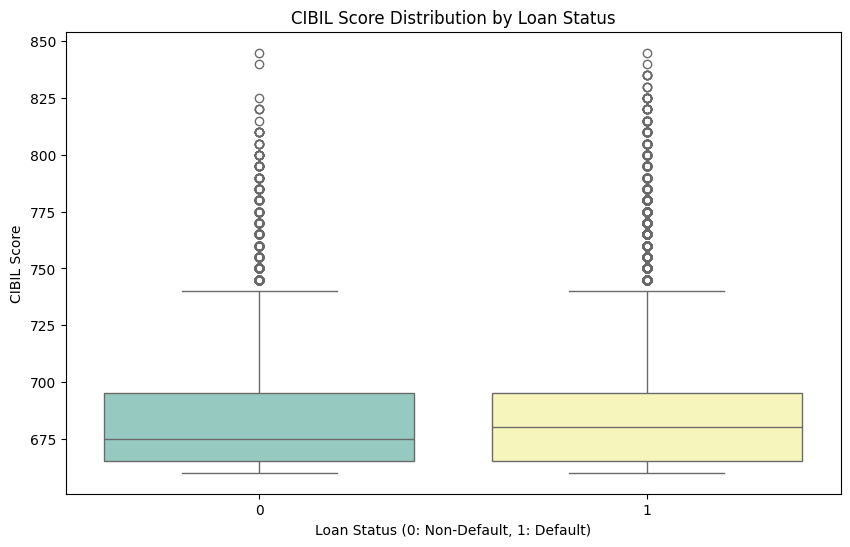

In [ ]:
# 4. CIBIL Score Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='loan_status', y='cibil_score', palette='Set3')
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('CIBIL Score')
plt.show()



<ipython-input-15-1e4c54353b8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_purpose_counts.index, y=loan_purpose_counts.values, palette='viridis')


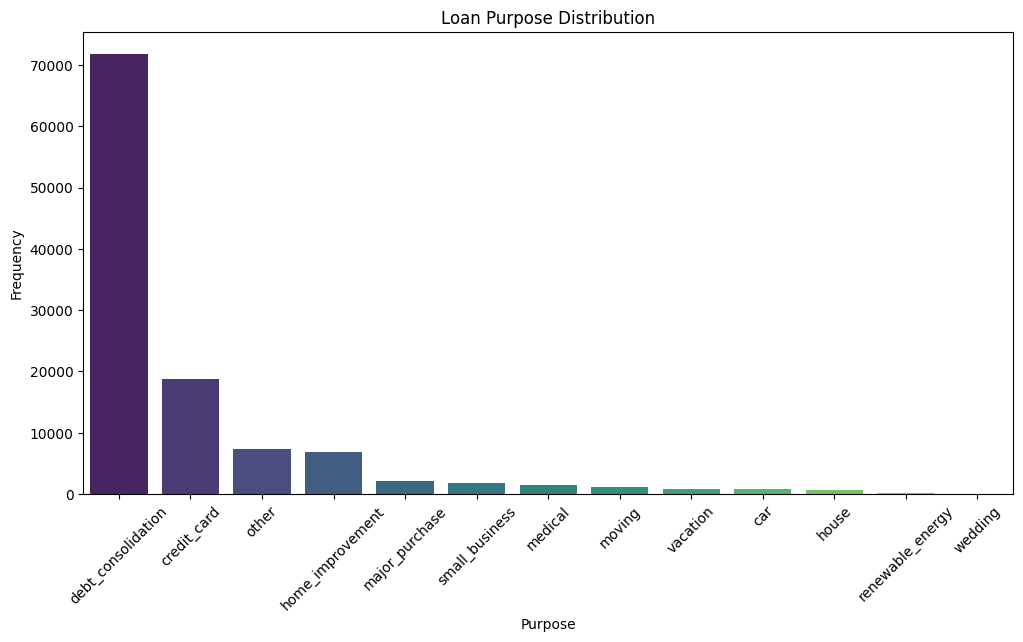

In [ ]:
# 5. Loan Purpose Analysis
plt.figure(figsize=(12, 6))
loan_purpose_counts = train_data['purpose'].value_counts()
sns.barplot(x=loan_purpose_counts.index, y=loan_purpose_counts.values, palette='viridis')
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



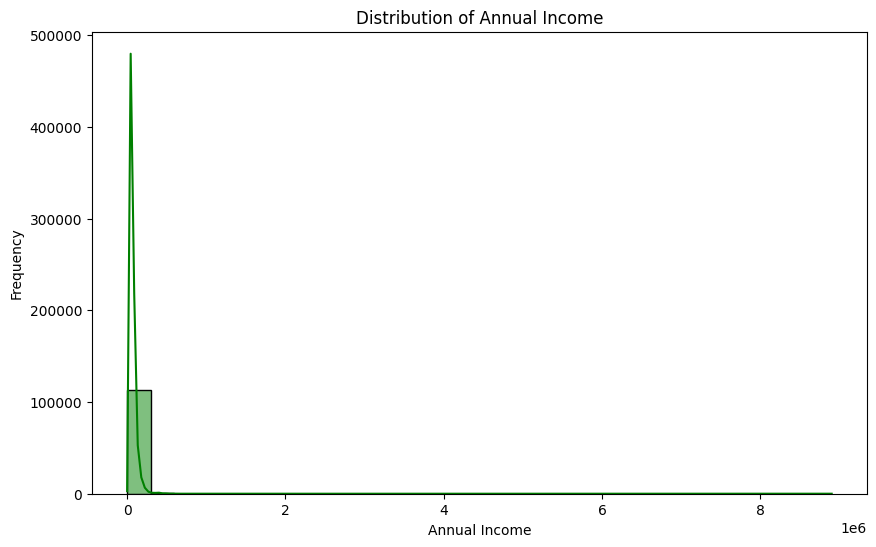

In [ ]:
# 6. Annual Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['annual_inc'], kde=True, bins=30, color='green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-bab7495506f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='home_ownership', palette='cool')


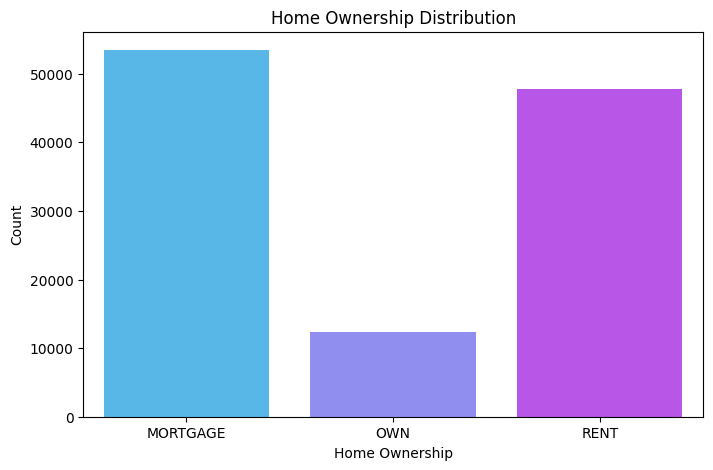

In [ ]:
# 7. Home Ownership Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='home_ownership', palette='cool')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()